In [241]:
#Perform pre-processing on the images to increase contrast between cells and background.
#Segment all cells by getting cell contours
#Display contours, each cell with a different colour - this must be consistent between image frames
#Given a contour, return appropriate information
    #Centroid position
    
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

from skimage import measure, color, io



from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)


In [3]:
#img1 = cv2.imread("Sequences/01/t019.tif", 0)

#ret1, thresh = cv2.threshold(img1, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#plt.figure(figsize=(15,15))
#plt.imshow(thresh)

In [4]:

MIN = 0
MAX = 2 ** 16 - 1

0
Sequences/02/*.tif*


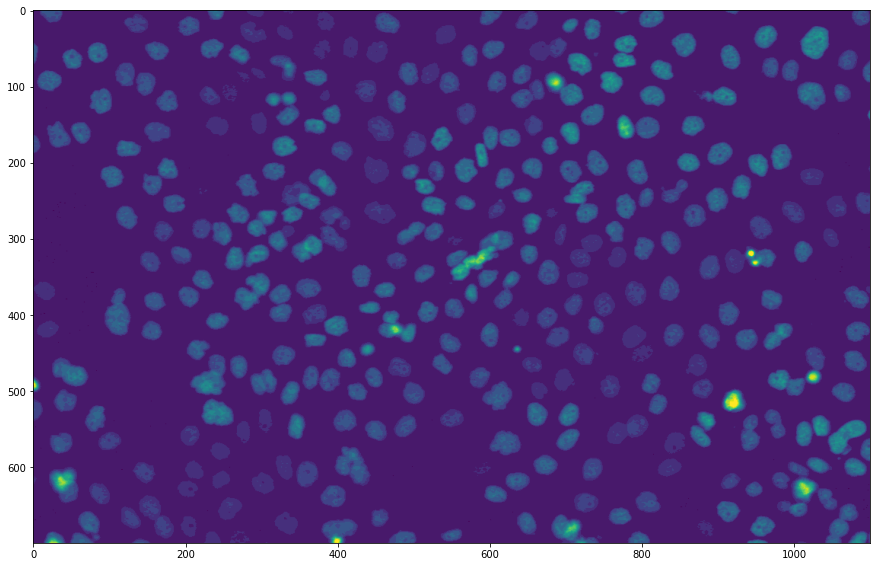

In [159]:
root_path = 'Sequences/0'
file_list = glob.glob('Sequences/05/*.*') #Rerurns a list of file names
print(len(file_list))




img_org = []
path = root_path + str(2) + '/*.tif*'
print(path)

for file in glob.glob(path): 
    #print(file)
    a = cv2.imread(file, 0)  #now, we can read each file since we have the full path
    #cv2.normalize(a, dst=None, alpha=MIN, beta=MAX, norm_type=cv2.NORM_MINMAX)
    img_org.append(a)
    
    #dim = a.shape
    #b = np.zeros((dim[0], dim[1]))
    #b = cv2.normalize(a,b, 0, 155, cv2.NORM_MINMAX)
    #img_list.append(b)

#plt.figure(figsize=(15,15))
#plt.imshow(img_list[70], cmap='gray')

plt.figure(figsize=(15,15))
plt.imshow(img_org[90])


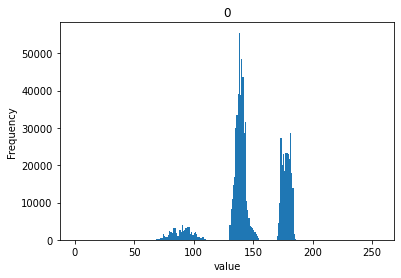

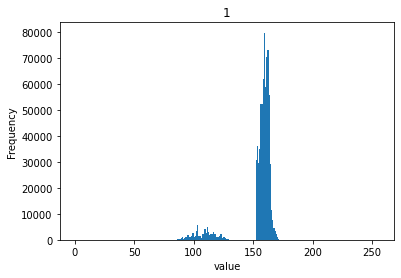

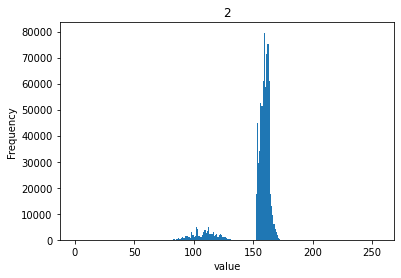

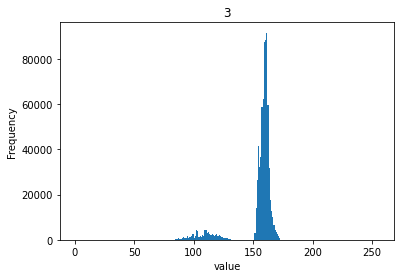

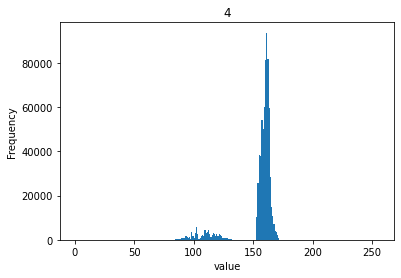

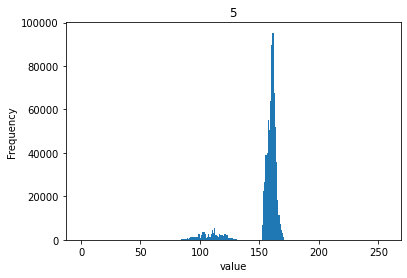

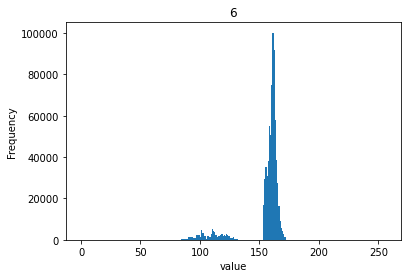

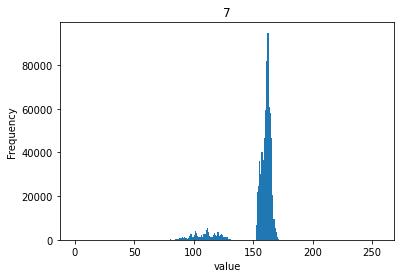

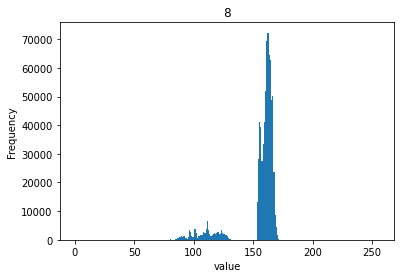

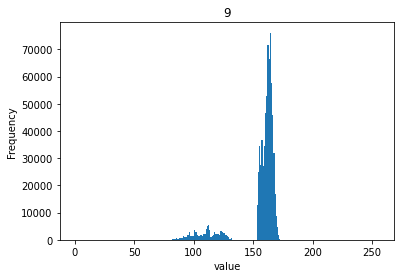

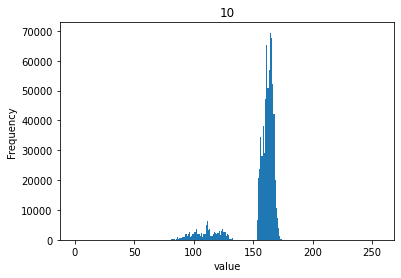

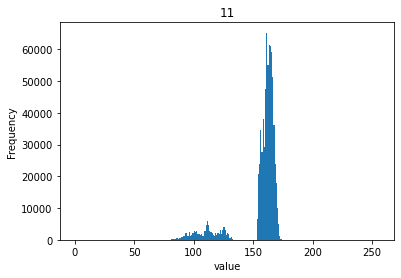

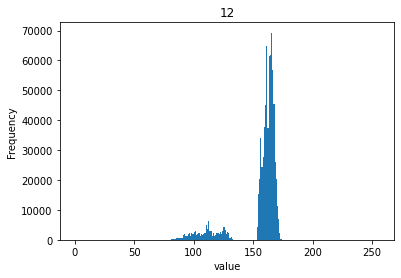

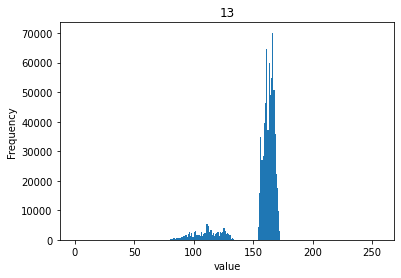

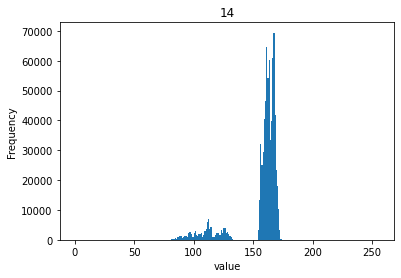

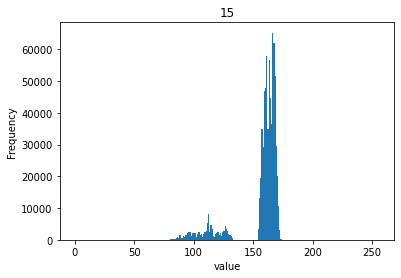

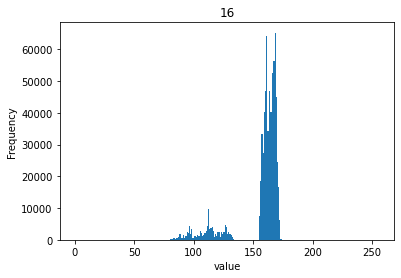

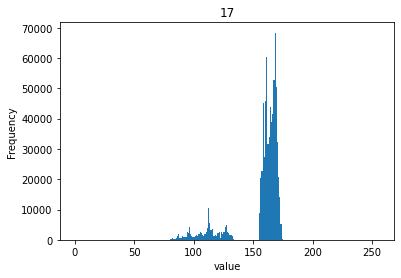

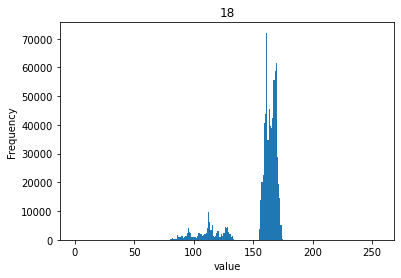

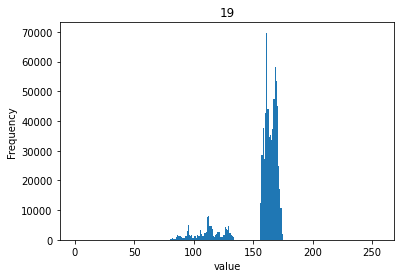

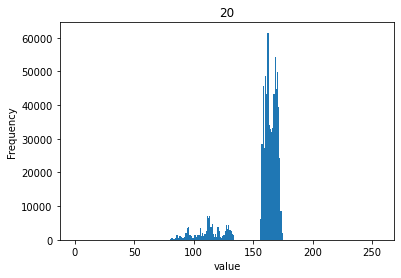

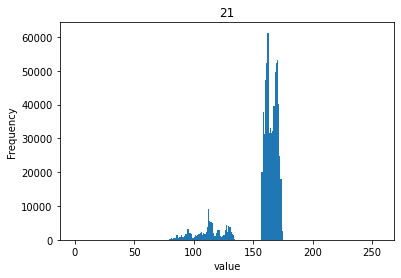

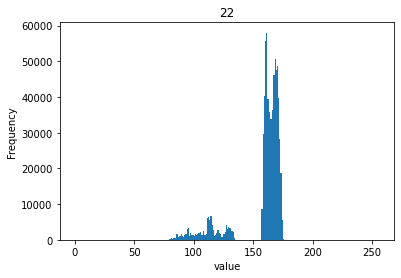

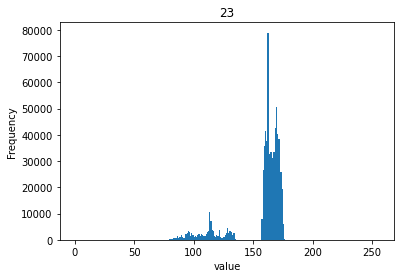

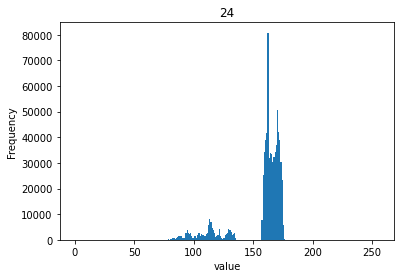

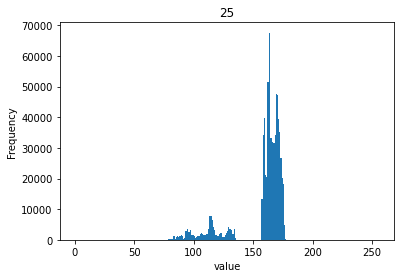

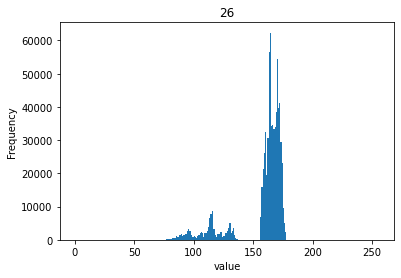

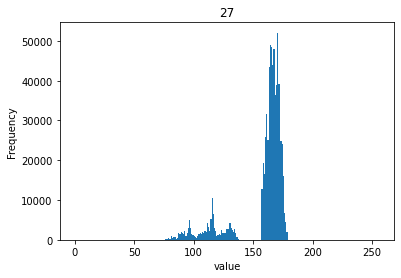

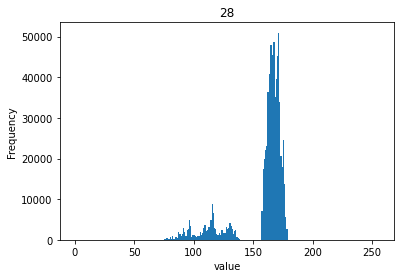

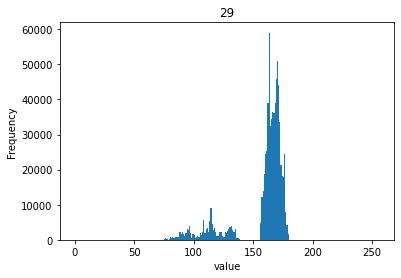

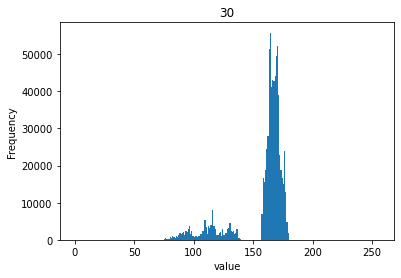

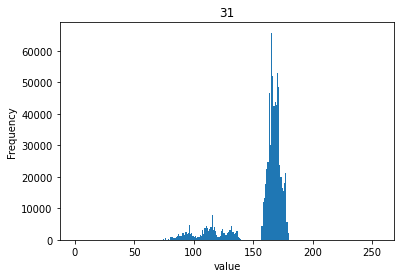

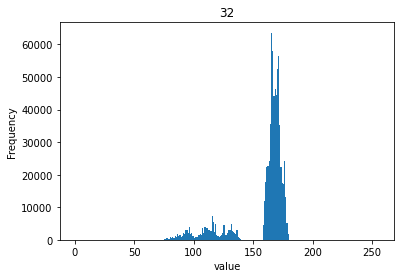

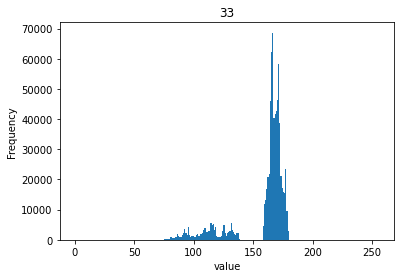

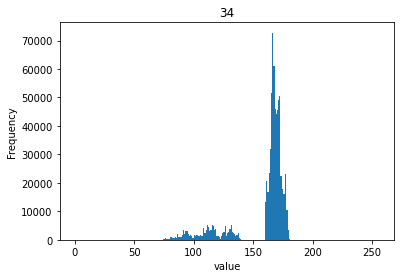

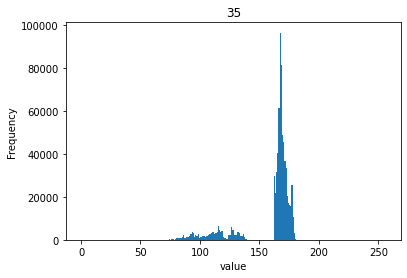

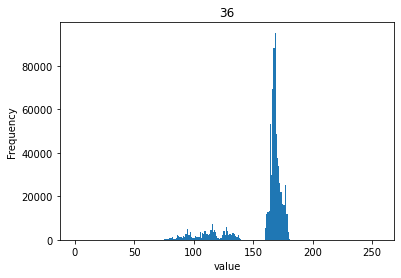

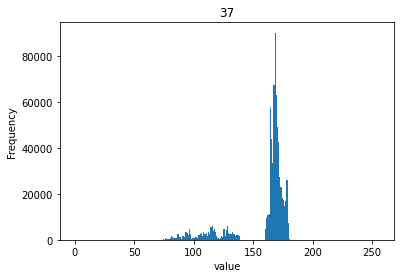

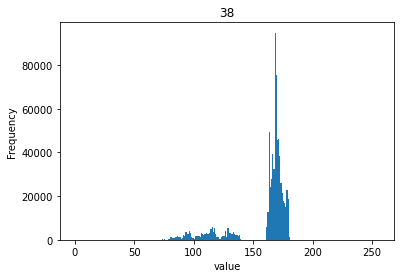

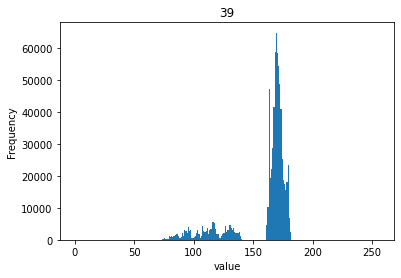

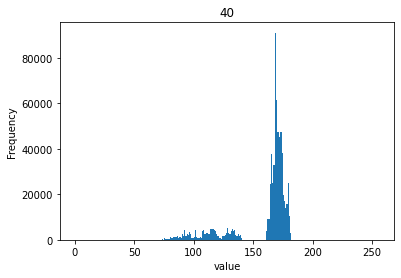

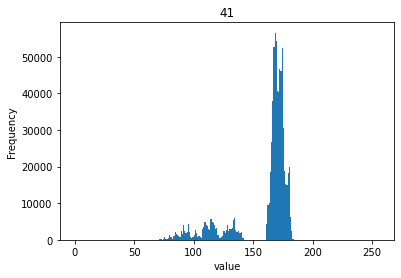

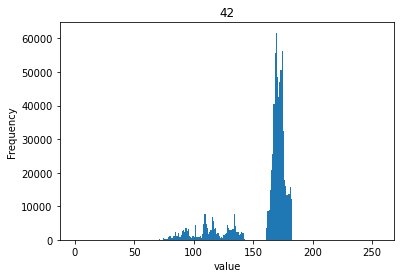

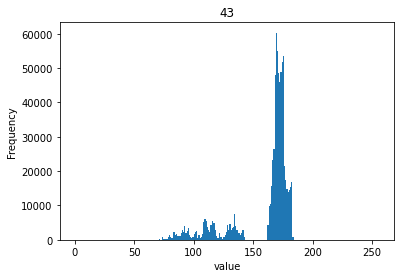

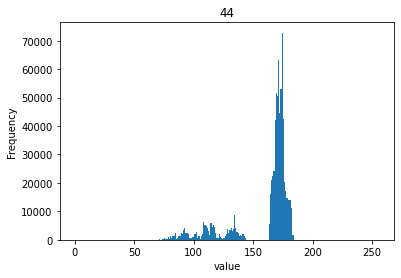

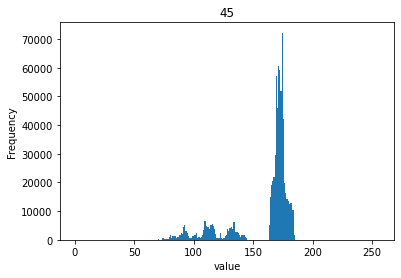

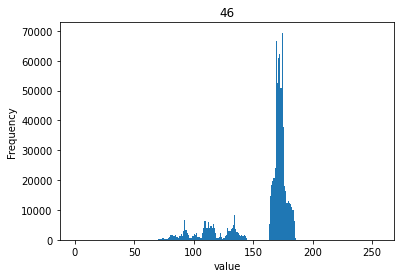

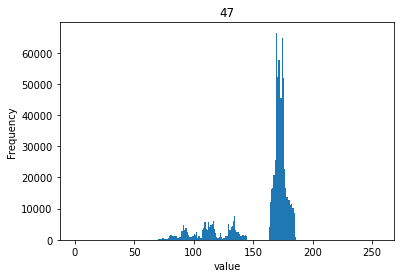

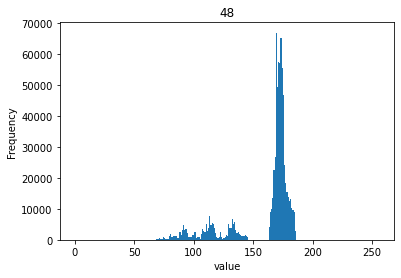

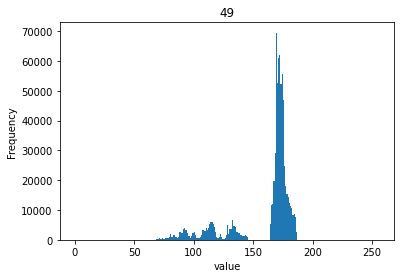

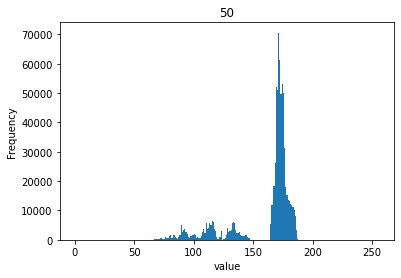

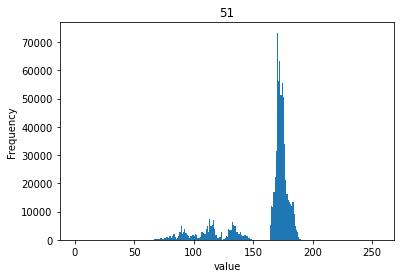

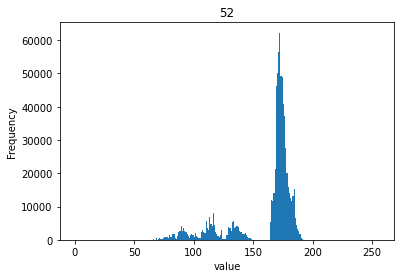

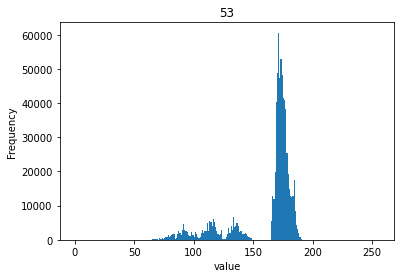

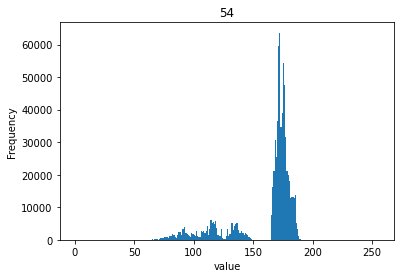

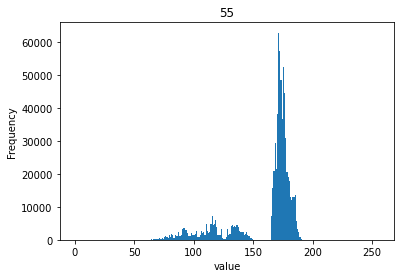

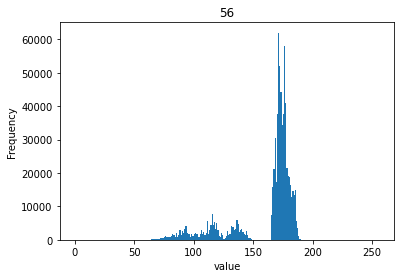

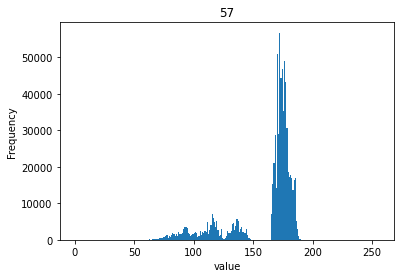

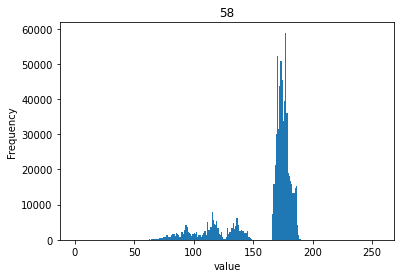

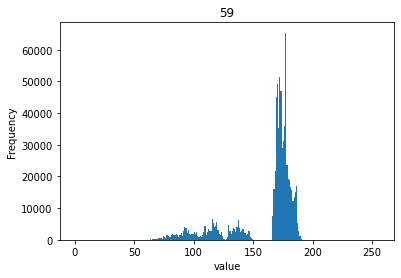

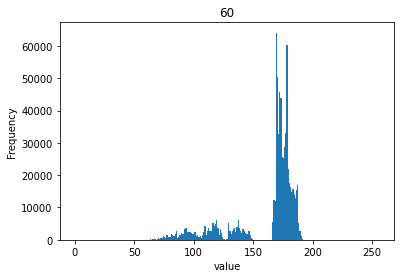

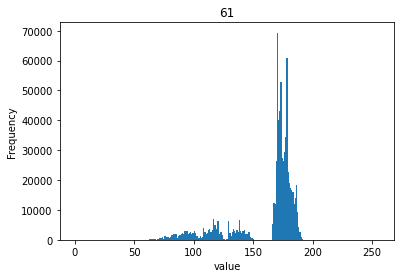

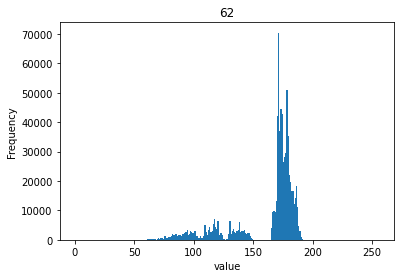

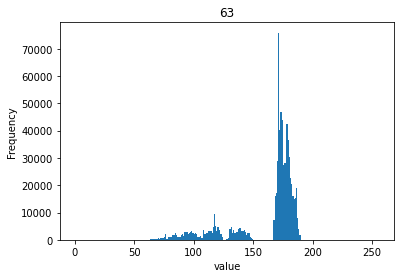

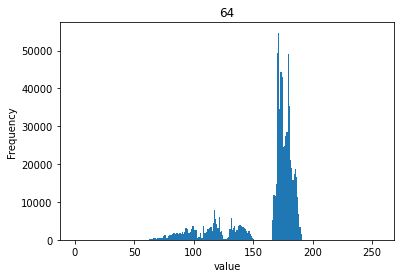

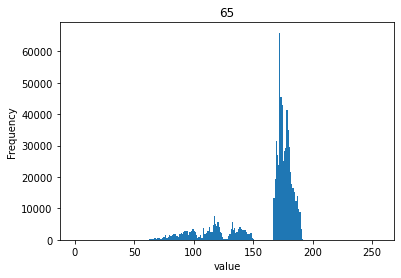

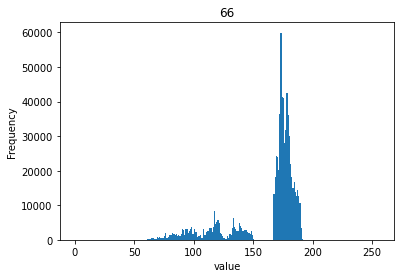

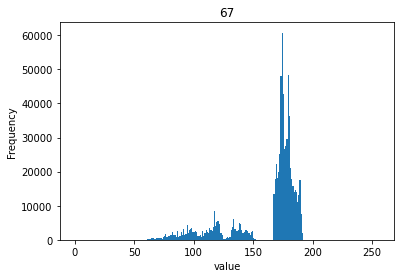

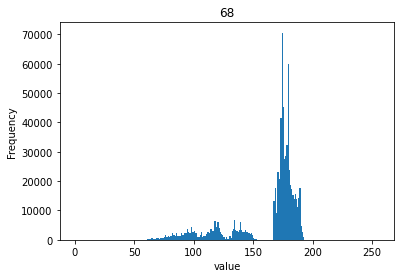

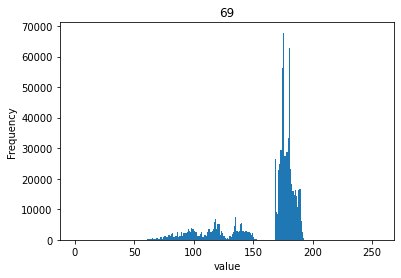

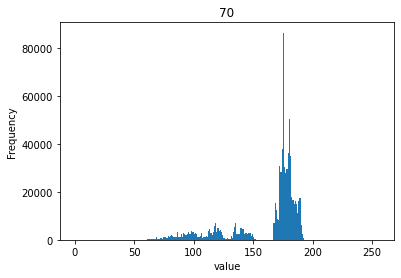

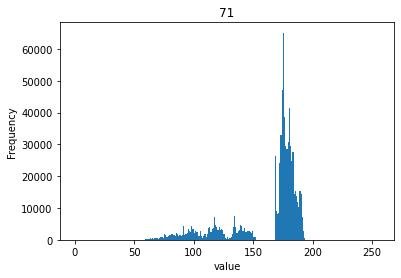

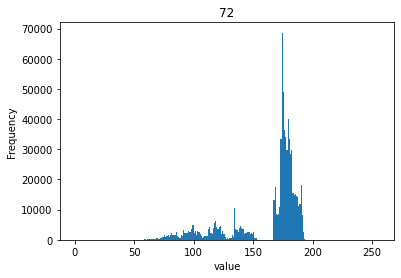

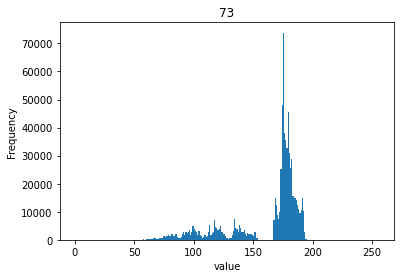

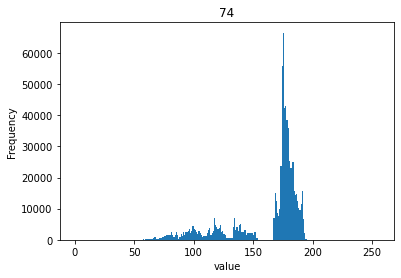

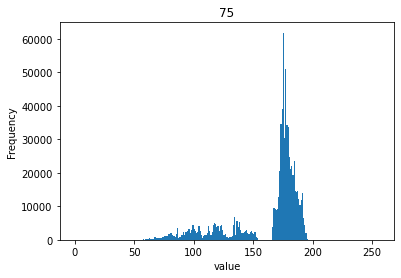

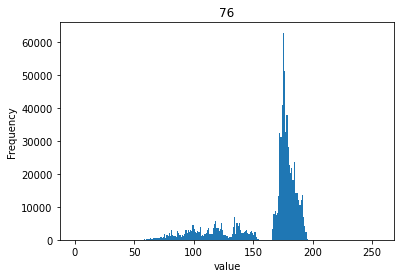

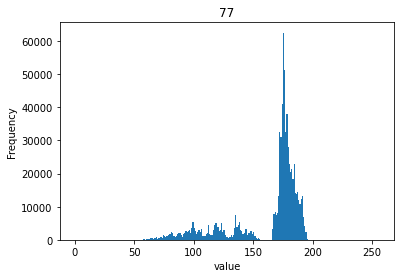

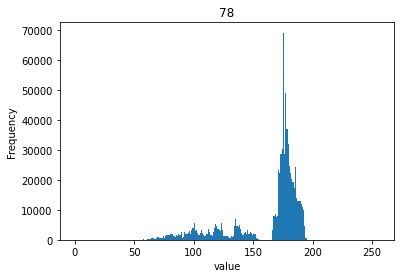

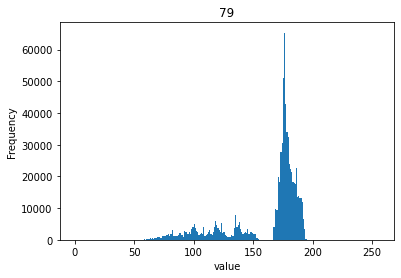

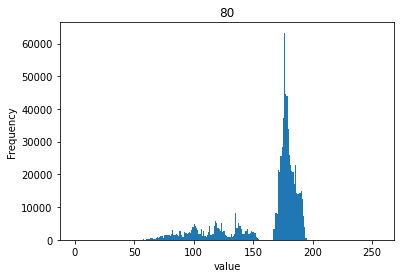

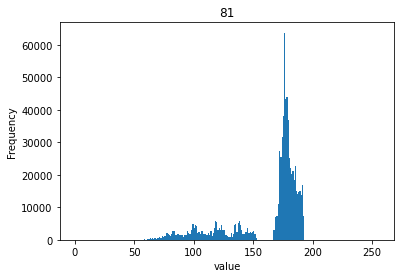

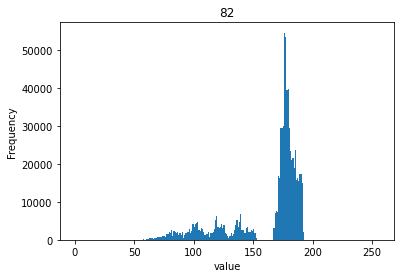

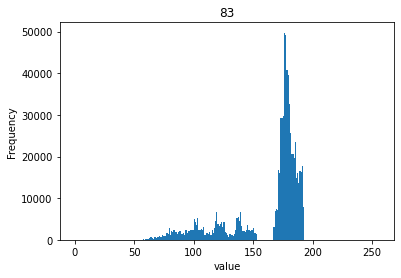

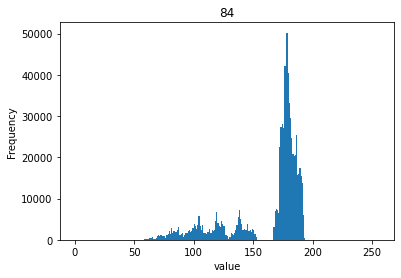

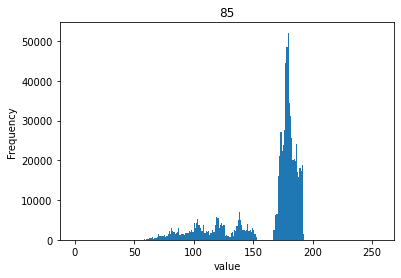

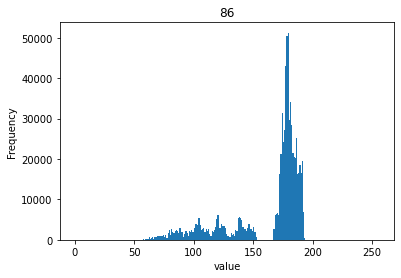

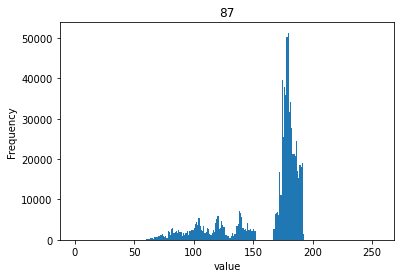

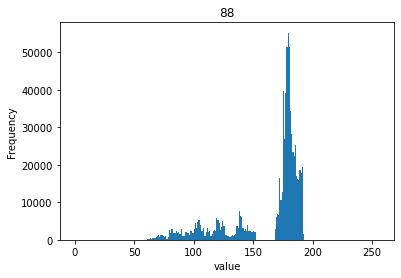

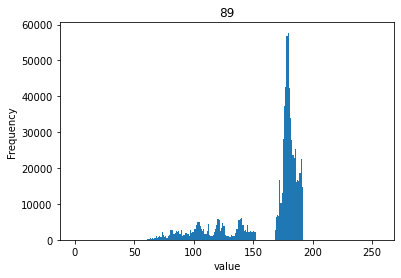

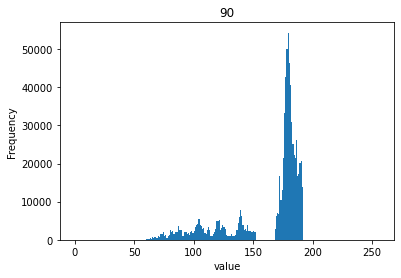

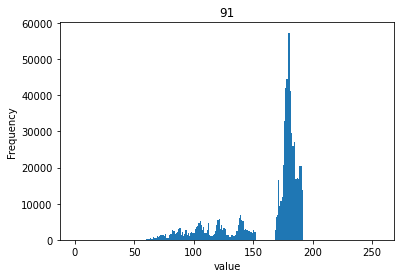

In [160]:
for i,img in enumerate(img_org):
    img_inv = (255-img)
    clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(4,4))
    cl1 = clahe.apply(img_inv)
    
    plt.title(i)
    plt.xlabel("value")
    plt.ylabel("Frequency")
    fig = plt.hist(cl1.ravel(),256,[0,256]); plt.show()
    

In [161]:
img = img_org[90].copy()

In [162]:

#ret1, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#plt.figure(figsize=(7,7))
#plt.imshow(thresh, cmap='gray')



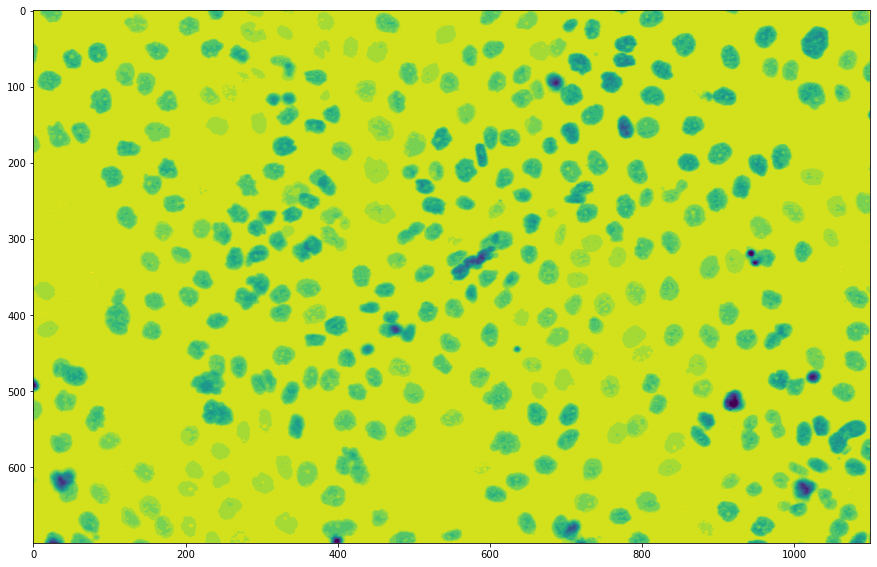

In [163]:
img_inv = (255-img)
plt.figure(figsize=(15,15))
plt.imshow(img_inv)

In [164]:
#kernel = np.ones((5,5), np.uint8)
#kernel1 = np.ones((8,8), np.uint8)
#img_e = cv2.erode(img_inv, kernel, iterations=1)
#img_d = cv2.dilate(img_e, kernel, iterations=1)

#plt.figure(figsize=(7,7))
#plt.imshow(img_d, cmap='gray')

#plt.figure(figsize=(5,5))
#plt.hist(img_d.ravel(),256,[0,256]); plt.show()

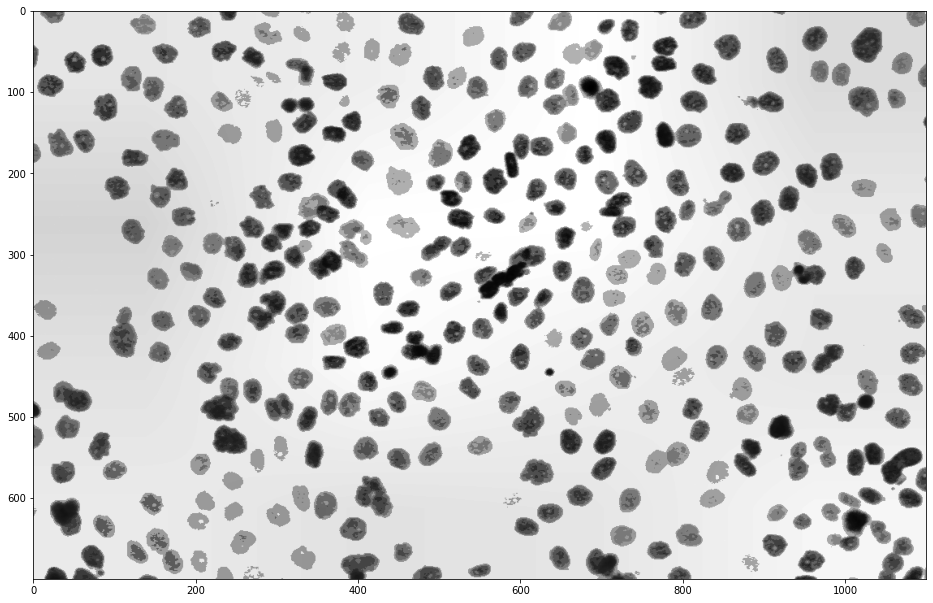

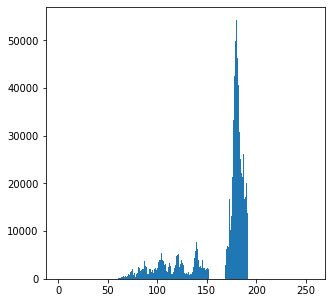

In [165]:
#Apply Clahe for histogram equalisation
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(4,4))
cl1 = clahe.apply(img_inv)


plt.figure(figsize=(16,16))
plt.imshow(cl1, cmap='gray')

plt.figure(figsize=(5,5))
plt.hist(cl1.ravel(),256,[0,256]); plt.show()



[[54290.]]


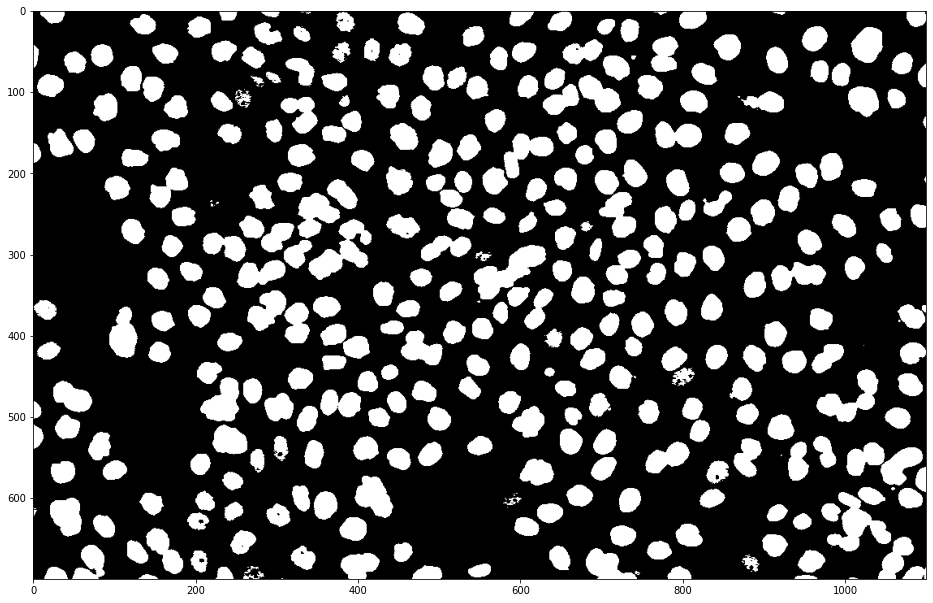

In [166]:
hist = cv2.calcHist([cl1],[0],None,[256],[0,256])

index = hist.argmax(axis=0)
freq = hist[index]
print(freq)
while freq != 0:
    index = index-1
    freq = hist[index]
    #print(index)
    #print(freq)

ret, thresh = cv2.threshold(cl1, index, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(16,16))
plt.imshow(thresh, cmap='gray')

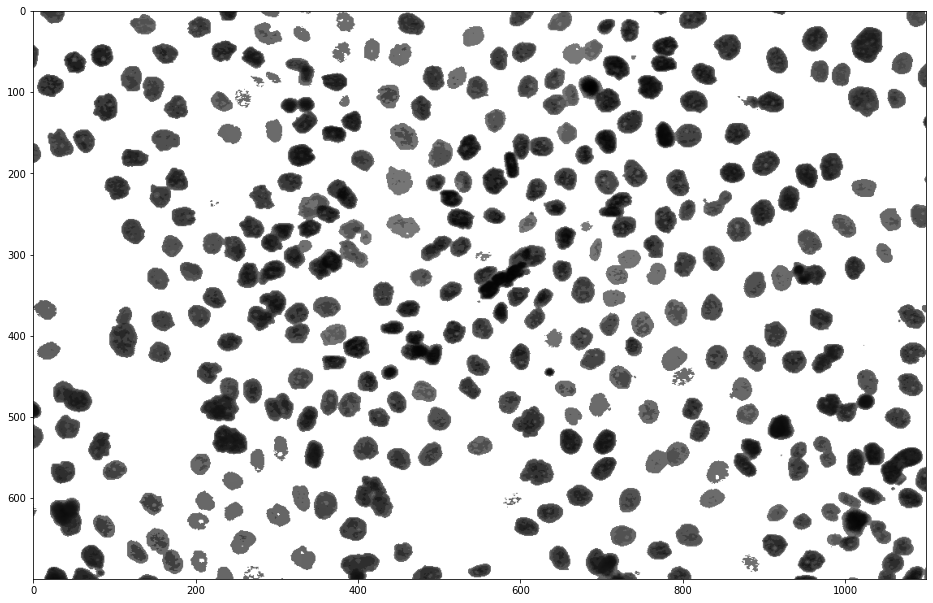

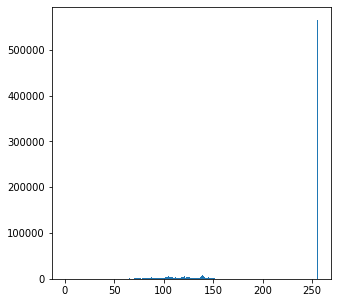

In [167]:
# The noise blob removing filter

img2 = cl1.copy()

img2[np.where(thresh == 0)] = 255

plt.figure(figsize=(16,16))
plt.imshow(img2, cmap='gray')

plt.figure(figsize=(5,5))
plt.hist(img2.ravel(),256,[0,256]); plt.show()


#blur = cv2.GaussianBlur(img2,(5,5),0)
#plt.figure(figsize=(16,16))
#plt.imshow(blur, cmap='gray')


57
151


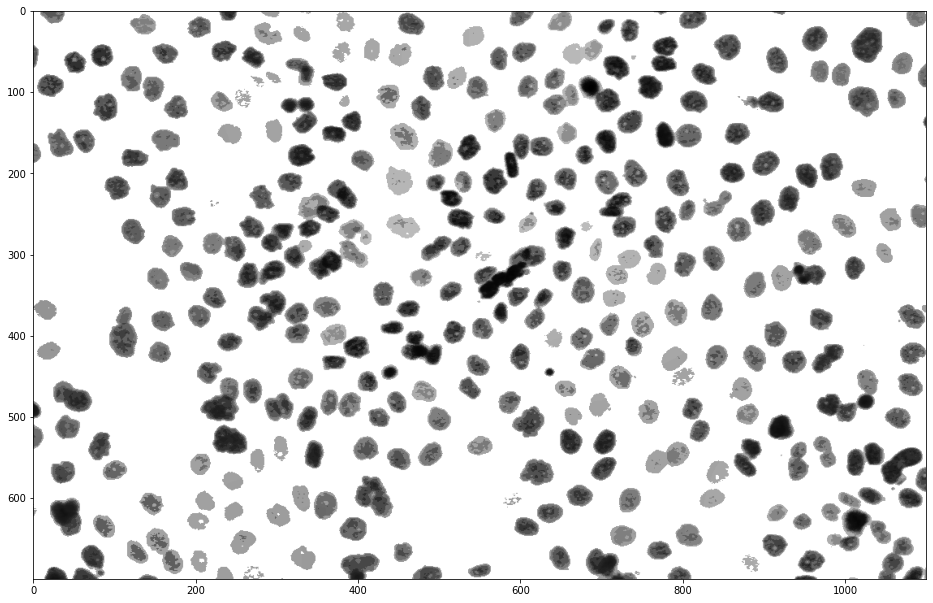

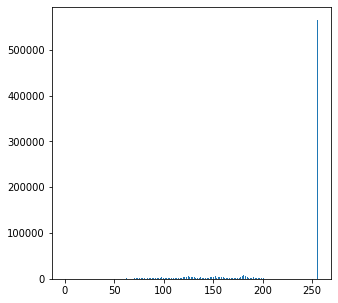

In [168]:

hist = cv2.calcHist([img2],[0],None,[256],[0,256])

max_index = 254
min_index = 0

while hist[max_index] == 0:
    max_index = max_index-1
    

while hist[min_index] == 0:
    min_index = min_index+1
    
    
height, width= img2.shape
img3 = img2.copy()

a = 50
b = 200
c = min_index #min pixel value in img
d = max_index #max pixel value in img
print(c)
print(d)

for x in range(width):
    for y in range(height):
        if img2[y,x] != 255:
            img3[y,x] = (img2[y,x]-c)*((b-a)/(d-c))+a


plt.figure(figsize=(16,16))
plt.imshow(img3, cmap='gray')

plt.figure(figsize=(5,5))
plt.hist(img3.ravel(),256,[0,256]); plt.show()

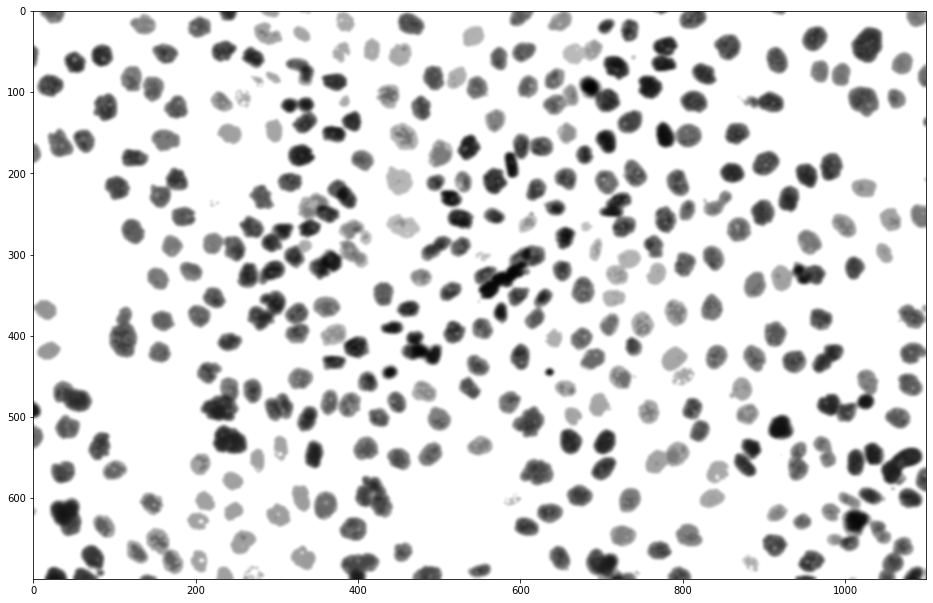

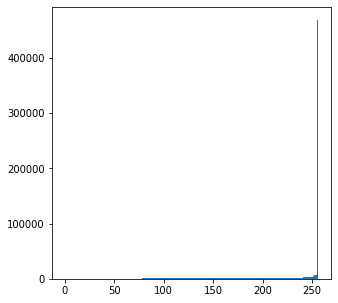

In [182]:
blur = cv2.GaussianBlur(img3,(9,9),0)


plt.figure(figsize=(16,16))
plt.imshow(blur, cmap='gray')

plt.figure(figsize=(5,5))
plt.hist(blur.ravel(),256,[0,256]); plt.show()

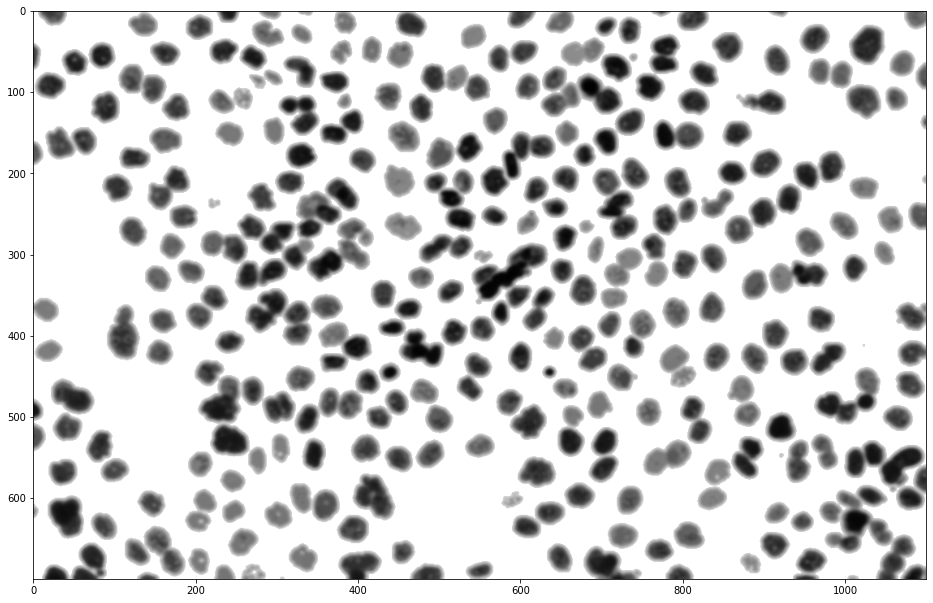

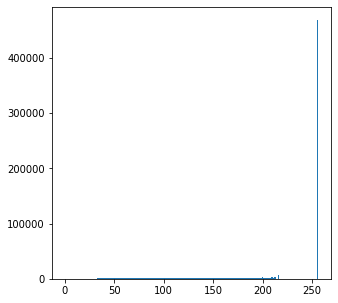

In [215]:
clahe2 = cv2.createCLAHE(clipLimit=40.0, tileGridSize=(4,4))
cl2 = clahe2.apply(blur)

plt.figure(figsize=(16,16))
plt.imshow(cl2, cmap='gray')

plt.figure(figsize=(5,5))
plt.hist(cl2.ravel(),256,[0,256]); plt.show()


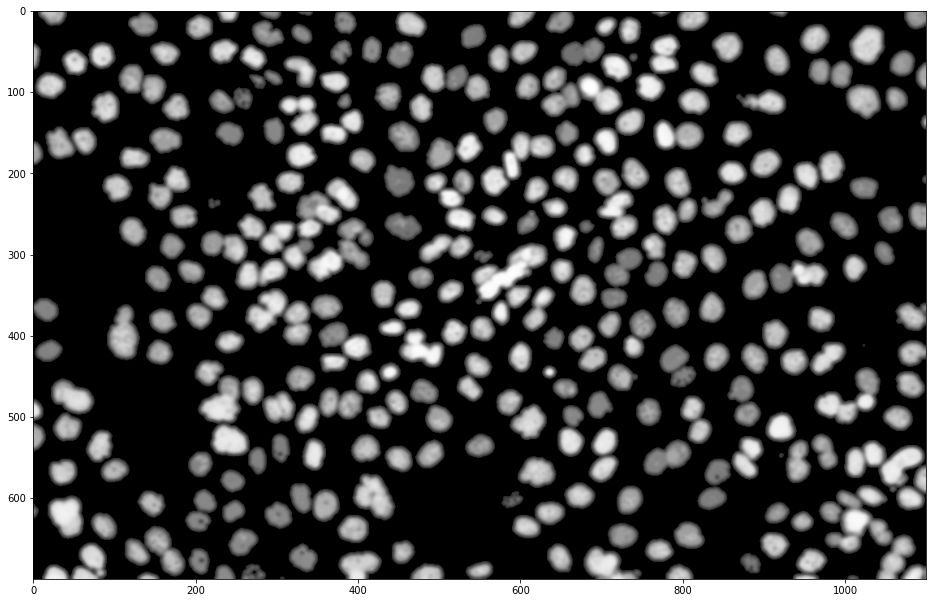

In [251]:
img_inv2 = (255-cl2)
plt.figure(figsize=(16,16))
plt.imshow(img_inv2, cmap='gray')

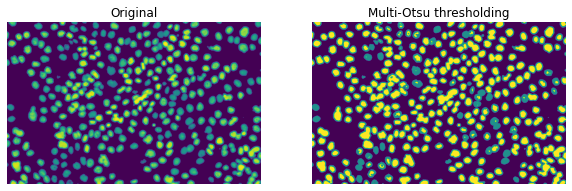

In [246]:
thresholds = filters.threshold_multiotsu(img_inv2, classes=3)
regions = np.digitize(img_inv2, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img_inv2)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

cells = img_inv2 > thresholds[0]

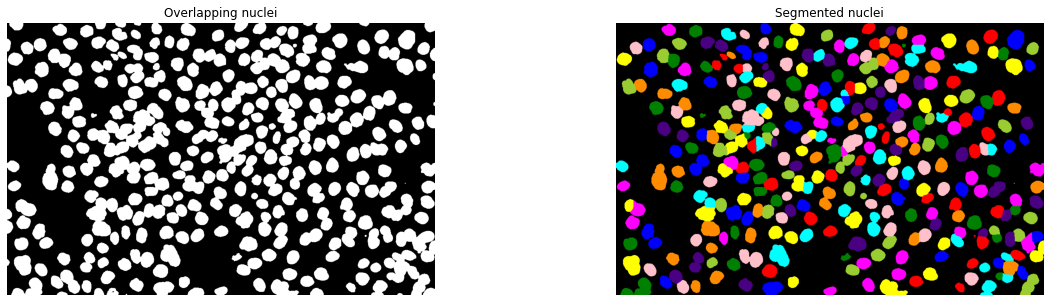

In [248]:
distance = ndi.distance_transform_edt(cells)

local_max_coords = feature.peak_local_max(distance, min_distance=7)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)

segmented_cells = segmentation.watershed(-distance, markers, mask=cells)

fig, ax = plt.subplots(ncols=2, figsize=(20, 5))
ax[0].imshow(cells, cmap='gray')
ax[0].set_title('Overlapping nuclei')
ax[0].axis('off')
ax[1].imshow(color.label2rgb(segmented_cells, bg_label=0))
ax[1].set_title('Segmented nuclei')
ax[1].axis('off')
plt.show()

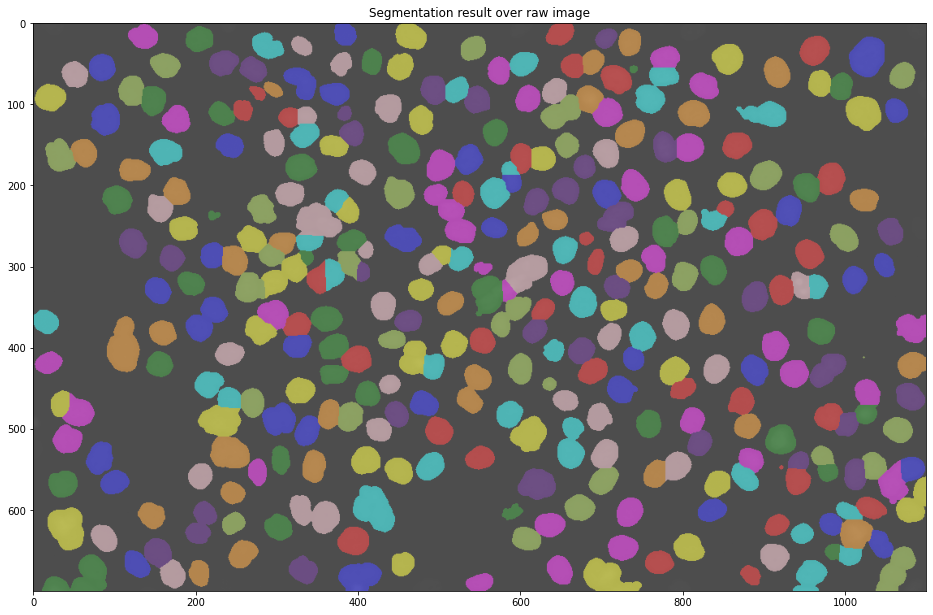

In [250]:
color_labels = color.label2rgb(segmented_cells, img, alpha=0.4, bg_label=0)

fig, ax = plt.subplots(figsize=(16, 16))
ax.imshow(color_labels)
ax.set_title('Segmentation result over raw image')
plt.show()

In [ ]:
##########################

In [ ]:
##############

In [ ]:
####################################